Dataset link: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Face Mask Detection/')

In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = 'dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


### Importing the necessary libraries

In [4]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [6]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


### Creating labels for the images

- with mask --> 1

- without mask --> 0

In [8]:
# creating the labels

with_mask_labels = [1] * len(with_mask_files)
print('Number of with mask labels:', len(with_mask_labels))

without_mask_labels = [0] * len(without_mask_files)
print('Number of without mask labels:', len(without_mask_labels))

Number of with mask labels: 3725
Number of without mask labels: 3828


In [9]:
print(with_mask_labels[ : 5])

print(without_mask_labels[ : 5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
# only the numpy array will gets added, here in the list it will be concatenated
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[ : 5])
print(labels[-5: ])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying the images

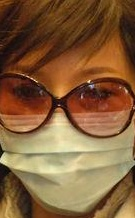

In [11]:
# displaying with mask image
img = cv2.imread('data/with_mask/with_mask_10.jpg')
cv2_imshow(img)

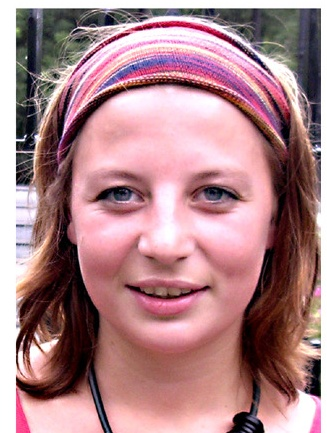

In [12]:
# displaying without mask image
imge = cv2.imread('data/without_mask/without_mask_996.jpg')
cv2_imshow(imge)

### Image processing

- 1. Resize the images

- 2. Convert the images into numpy arrays

In [13]:
images = []

Data_Dir = 'data'
Categories = ['with_mask', 'without_mask']

for category in Categories:

    path = os.path.join(Data_Dir, category) # Creating path to use all type of images in Data_Dir folder

    for img in os.listdir(path):

        # img_path = os.path.join(path, img) # all images path
        image = cv2.imread(os.path.join(path, img))

        # print(img_array) # printing the array of the image
        # plt.imshow(img_array) # diplaying the image
        img_resized = cv2.resize(image, (128,128)) # resizing the images

        image_array = np.array(img_resized)

        images.append(image_array)

In [14]:
len(images)

7553

In [15]:
type(images)

list

In [16]:
images[0]

array([[[32, 59, 51],
        [34, 56, 46],
        [41, 57, 55],
        ...,
        [17, 23, 18],
        [25, 40, 36],
        [17, 40, 34]],

       [[29, 53, 46],
        [37, 59, 49],
        [39, 62, 59],
        ...,
        [11, 20, 18],
        [47, 59, 53],
        [28, 46, 37]],

       [[37, 59, 52],
        [36, 58, 49],
        [39, 65, 61],
        ...,
        [18, 32, 34],
        [15, 21, 16],
        [21, 34, 24]],

       ...,

       [[38, 73, 62],
        [41, 76, 66],
        [50, 85, 74],
        ...,
        [ 2,  7,  8],
        [21, 26, 27],
        [ 8, 13, 13]],

       [[35, 73, 60],
        [39, 70, 59],
        [50, 76, 68],
        ...,
        [11, 15, 16],
        [11, 14, 16],
        [ 7,  9, 14]],

       [[30, 69, 53],
        [36, 63, 52],
        [43, 63, 57],
        ...,
        [15, 17, 18],
        [10, 11, 15],
        [13, 12, 21]]], dtype=uint8)

In [17]:
type(images[0])

numpy.ndarray

In [18]:
images[0].shape

(128, 128, 3)

In [19]:
# converting image list and label list to numpy arrays

X = np.array(images)
Y = np.array(labels)

In [20]:
print(X)

[[[[ 32  59  51]
   [ 34  56  46]
   [ 41  57  55]
   ...
   [ 17  23  18]
   [ 25  40  36]
   [ 17  40  34]]

  [[ 29  53  46]
   [ 37  59  49]
   [ 39  62  59]
   ...
   [ 11  20  18]
   [ 47  59  53]
   [ 28  46  37]]

  [[ 37  59  52]
   [ 36  58  49]
   [ 39  65  61]
   ...
   [ 18  32  34]
   [ 15  21  16]
   [ 21  34  24]]

  ...

  [[ 38  73  62]
   [ 41  76  66]
   [ 50  85  74]
   ...
   [  2   7   8]
   [ 21  26  27]
   [  8  13  13]]

  [[ 35  73  60]
   [ 39  70  59]
   [ 50  76  68]
   ...
   [ 11  15  16]
   [ 11  14  16]
   [  7   9  14]]

  [[ 30  69  53]
   [ 36  63  52]
   [ 43  63  57]
   ...
   [ 15  17  18]
   [ 10  11  15]
   [ 13  12  21]]]


 [[[ 12  57 113]
   [ 14  61 117]
   [ 20  69 125]
   ...
   [ 26  53  87]
   [ 27  54  88]
   [ 30  52  88]]

  [[ 34  81 137]
   [ 35  82 138]
   [ 30  77 133]
   ...
   [ 17  44  78]
   [ 13  38  72]
   [ 19  42  76]]

  [[ 21  68 125]
   [ 22  69 125]
   [ 15  61 115]
   ...
   [ 16  43  77]
   [ 21  46  80]
   [ 24  44

In [21]:
print(Y)

[1 1 1 ... 0 0 0]


In [22]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [23]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y,random_state = 1)

In [25]:
print(X.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
print(Y.shape, y_train.shape, y_test.shape)

(7553,) (6042,) (1511,)


### Normalizing the image

In [27]:
X_train = x_train / 255.0

X_test = x_test / 255.0

### Building a Convolutional Neural Network

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
# compiling the neural network
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [31]:
# training the neural network
history = model.fit(X_train, y_train, batch_size = 128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
48/48 [==============================] - 19s 200ms/step - loss: 0.4643 - accuracy: 0.7706 - val_loss: 0.3036 - val_accuracy: 0.8769
Epoch 2/10
48/48 [==============================] - 6s 135ms/step - loss: 0.2850 - accuracy: 0.8843 - val_loss: 0.2491 - val_accuracy: 0.8941
Epoch 3/10
48/48 [==============================] - 6s 129ms/step - loss: 0.2493 - accuracy: 0.8992 - val_loss: 0.2713 - val_accuracy: 0.8915
Epoch 4/10
48/48 [==============================] - 6s 130ms/step - loss: 0.2344 - accuracy: 0.9076 - val_loss: 0.2065 - val_accuracy: 0.9206
Epoch 5/10
48/48 [==============================] - 6s 129ms/step - loss: 0.1964 - accuracy: 0.9225 - val_loss: 0.1847 - val_accuracy: 0.9212
Epoch 6/10
48/48 [==============================] - 6s 134ms/step - loss: 0.1825 - accuracy: 0.9287 - val_loss: 0.1664 - val_accuracy: 0.9318
Epoch 7/10
48/48 [==============================] - 7s 142ms/step - loss: 0.1574 - accuracy: 0.9398 - val_loss: 0.1588 - val_accuracy: 0.9318
Epoch

### Model Evaluation

In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 15ms/step - loss: 0.1450 - accuracy: 0.9484
Test Accuracy = 0.9483785629272461


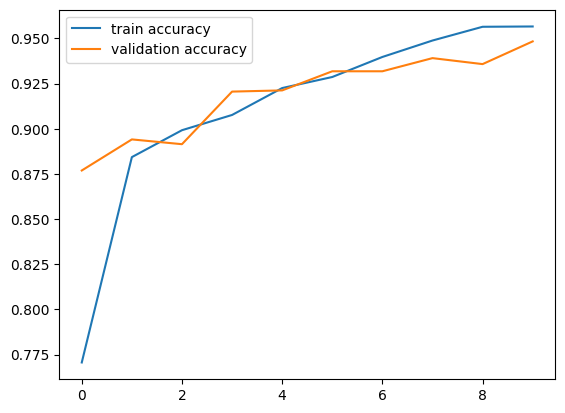

In [33]:
# plot the accuracy value
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

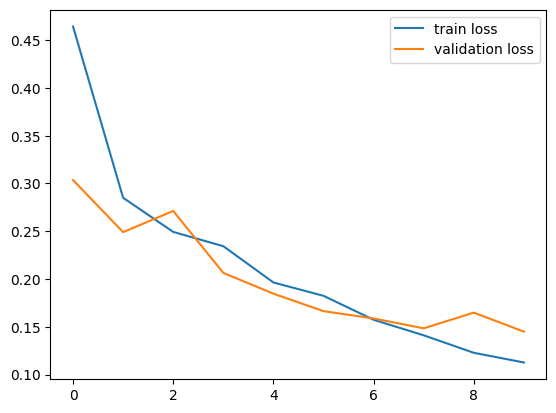

In [34]:
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Performance metrics

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
pred = model.predict(X_test)

prediction = np.where(pred > 0.5,1,0)

48/48 [==============================] - 1s 13ms/step


In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

[[743  23]
 [ 55 690]]


In [38]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       766
           1       0.97      0.93      0.95       745

    accuracy                           0.95      1511
   macro avg       0.95      0.95      0.95      1511
weighted avg       0.95      0.95      0.95      1511



### Prediction

In [39]:
def prediction():

    input_image_path = input('Path of the image to be predicted: ')

    input_image = cv2.imread(input_image_path)

    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128,128))


    input_image_reshaped = np.reshape(input_image_resized, [1,128,128,3])

    input_prediction = model.predict(input_image_reshaped)

    print(input_prediction)


    input_pred_label = np.where(input_prediction > 0.5,1,0)

    print(input_pred_label)


    if input_pred_label == 1:

      return 'The person in the image is wearing a mask'

    else:

      return 'The person in the image is not wearing a mask'

Path of the image to be predicted: test1.jpg


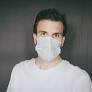

1/1 [==============================] - 0s 390ms/step
[[1.]]
[[1]]


'The person in the image is wearing a mask'

In [40]:
prediction()

Path of the image to be predicted: test2.jpg


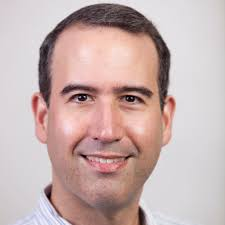

1/1 [==============================] - 0s 18ms/step
[[0.]]
[[0]]


'The person in the image is not wearing a mask'

In [41]:
prediction()